In [35]:
from utilities import Tree, FullMesh, Percept
import json
import perceval as pcvl
import numpy as np

## Set up the learning environment

In [2]:
# create two percepts, the observables are "color" and "shape"
# the values are "red" and "circle" for the first percept
# and "blue" and "square" for the second percept
pcpt0 = Percept({"color": "red", "shape": "circle"})
pcpt1 = Percept({"color": "blue", "shape": "square"})
pcpt2 = Percept({"color": "red", "shape": "square"})
pcpt3 = Percept({"color": "blue", "shape": "circle"})
percepts = [pcpt0, pcpt1, pcpt2, pcpt3]
# create a dictionary of the observables with name and possible values
observables = {"color": ["red", "blue"], "shape": ["circle", "square"]}

## Upload the trained parameters
We stored the optimal parameters for both stages as json files. The structure of the file is the following:

-> First stage:
```json
{
    "backend": {
        "percept_index": [...],
        ...
    }
}
```
-> Second stage
```json
{
    "backend": [...],
    ...
}
```

Where the percept index refers to the index of the percepts used in the list `percepts` and the possible values for the backend are `['ideal', 'noisy', 'hardware']`.

In [23]:
with open("trained_parameters/params_stage_one.json", "r") as f:
    params_stage_one = json.load(f)
with open("trained_parameters/params_stage_two.json", "r") as f:
    params_stage_two = json.load(f)

## Trained models

### Stage 1

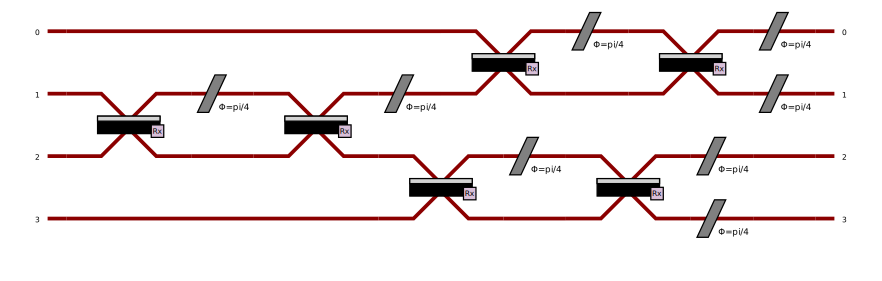

In [24]:
# visualize the circuit for the first stage
tree = Tree(n_leaves=4)
pcvl.pdisplay(tree.circuit)

In [25]:
# create the mapping optical mode -> observable value
mode_to_obs_value = {
    0: "red",
    1: "blue",
    2: "circle",
    3: "square"
}

In [28]:
# upload specific parameters for a given backend and percept
backend = "ideal"
percept_idx = '0'
tree.updateCircuit(params_stage_one[backend][percept_idx])

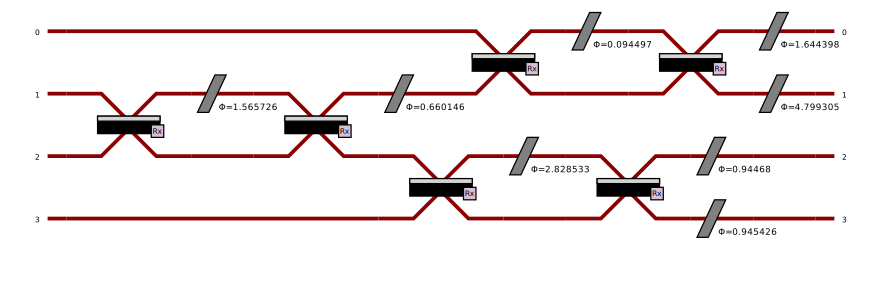

In [29]:
# visualize the circuit with the trained parameters
pcvl.pdisplay(tree.circuit)

In [36]:
# get the probabilities of the optical modes
probs = tree.pdf()
# print info on the current percept and the probabilities mapping
# the optical modes to the observable values
print("Percept: ", percept_idx, " -> (", percepts[int(percept_idx)].color, ", ", percepts[int(percept_idx)].shape, ")")
print("Probabilities: ", {mode_to_obs_value[i]: np.round(probs[i], 3) for i in range(4)})

Percept:  0  -> ( red ,  circle )
Probabilities:  {'red': 0.496, 'blue': 0.001, 'circle': 0.49, 'square': 0.012}


### Stage 2

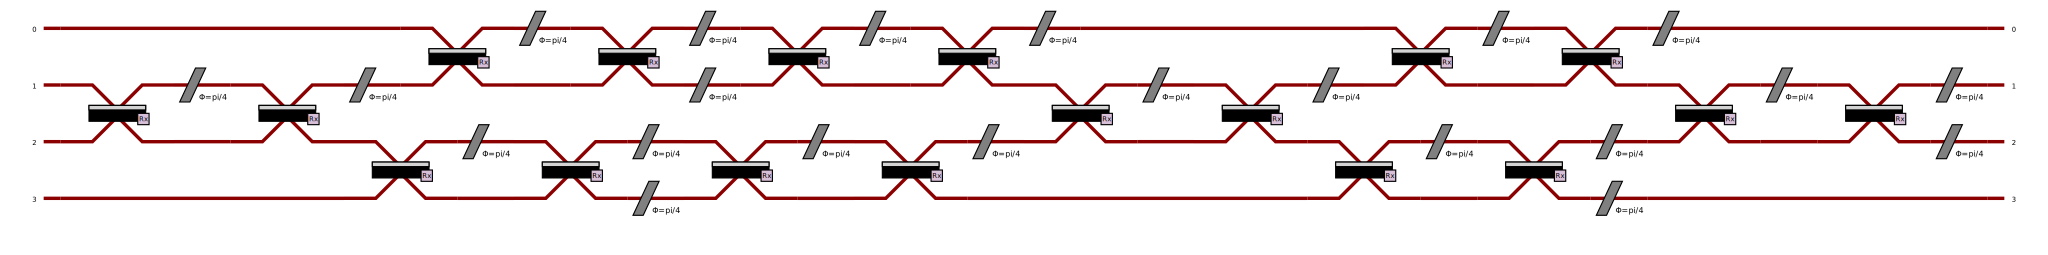

In [37]:
# visualize the circuit for the second stage
full_mesh = FullMesh(n_leaves=4)
pcvl.pdisplay(full_mesh.circuit)

In [38]:
# create the mapping optical mode -> yes/no answer, 
# post selection is already included in the FullMesh class,
# i.e. it wil display just the probabilities on the first
# two modes
mode_to_ans = {
    0: "no",
    1: "yes" 
}

In [43]:
# upload specific parameters for a given backend and percept
backend = "ideal"
percept_idx = '1'
# upload the parameters for the first part of the circuit from the previous stage
full_mesh.updateTree(params_stage_one[backend][percept_idx])
# upload the parameters for the second part of the circuit
full_mesh.updateMesh(params_stage_two[backend])

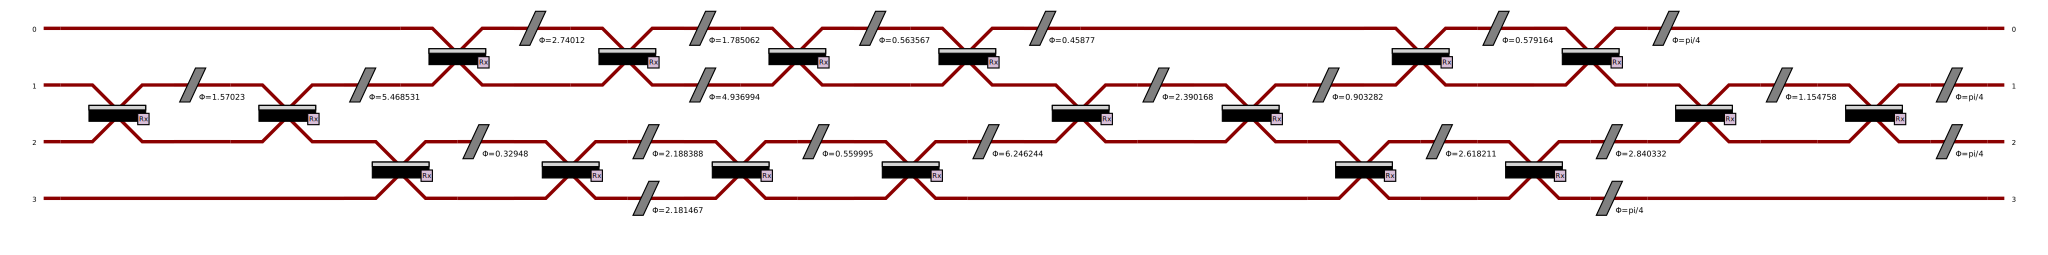

In [44]:
# visualize the circuit with the trained parameters
pcvl.pdisplay(full_mesh.circuit)

In [45]:
# get the probabilities of the optical modes
probs = full_mesh.pdf()
# print the task query
print("The current task query is: Is the given percept both blue and a square?")
# print info on the current percept and the probabilities mapping
# the optical modes to the observable values
print("Percept: ", percept_idx, " -> (", percepts[int(percept_idx)].color, ", ", percepts[int(percept_idx)].shape, ")")
print("Probabilities: ", {mode_to_ans[i]: np.round(probs[i], 3) for i in range(2)})

The current task query is: Is the given percept both blue and a square?
Percept:  1  -> ( blue ,  square )
Probabilities:  {'no': 0.001, 'yes': 0.999}
